Student Marks Prediction (Multiple Features) 

Goal: Predict students marks using multiple feature factor like:

Hours Studied, Sleep Hours, Class Attendance, Number of Practise tests

Import Required Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

Creating the Dataset

In [102]:
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 5.5, 6, 7.5, 8.5, 9.5],
    'Sleep_Hours': [6, 7, 7, 6.5, 6, 6, 7, 5.5, 5, 4.5],
    'Class_Attendance': [80, 85, 90, 95, 100, 95, 90, 85, 80, 75],
    'Practice_Tests': [0, 1, 1, 1, 2, 2, 3, 3, 4, 5],
    'Marks': [35, 45, 50, 55, 60, 63, 70, 78, 85, 95]
}

df = pd.DataFrame(data)
print(df)

   Hours_Studied  Sleep_Hours  Class_Attendance  Practice_Tests  Marks
0            1.0          6.0                80               0     35
1            2.0          7.0                85               1     45
2            3.0          7.0                90               1     50
3            4.0          6.5                95               1     55
4            5.0          6.0               100               2     60
5            5.5          6.0                95               2     63
6            6.0          7.0                90               3     70
7            7.5          5.5                85               3     78
8            8.5          5.0                80               4     85
9            9.5          4.5                75               5     95


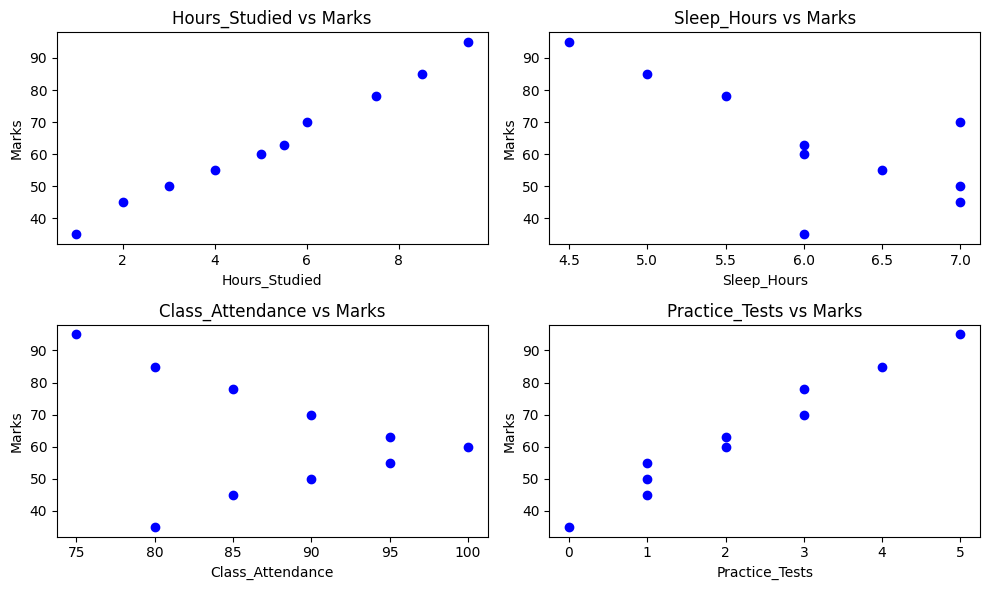

In [103]:
plt.figure(figsize=(10, 6))

features = ['Hours_Studied', 'Sleep_Hours', 'Class_Attendance', 'Practice_Tests']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feature], df['Marks'], color='blue')
    plt.title(f'{feature} vs Marks')
    plt.xlabel(feature)
    plt.ylabel('Marks')

plt.tight_layout()
plt.show()

Defining Features (X) and Target (y)

In [104]:
X = df[['Hours_Studied', 'Sleep_Hours', 'Class_Attendance', 'Practice_Tests']]
y = df['Marks']

Split the Dataset

In [105]:
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.5, random_state=42
)

Train the Model

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluate the Model

In [107]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(f'R^2 Score: {r2}')

Mean Squared Error: 4.808333333333385
R^2 Score: 0.9866494520953649


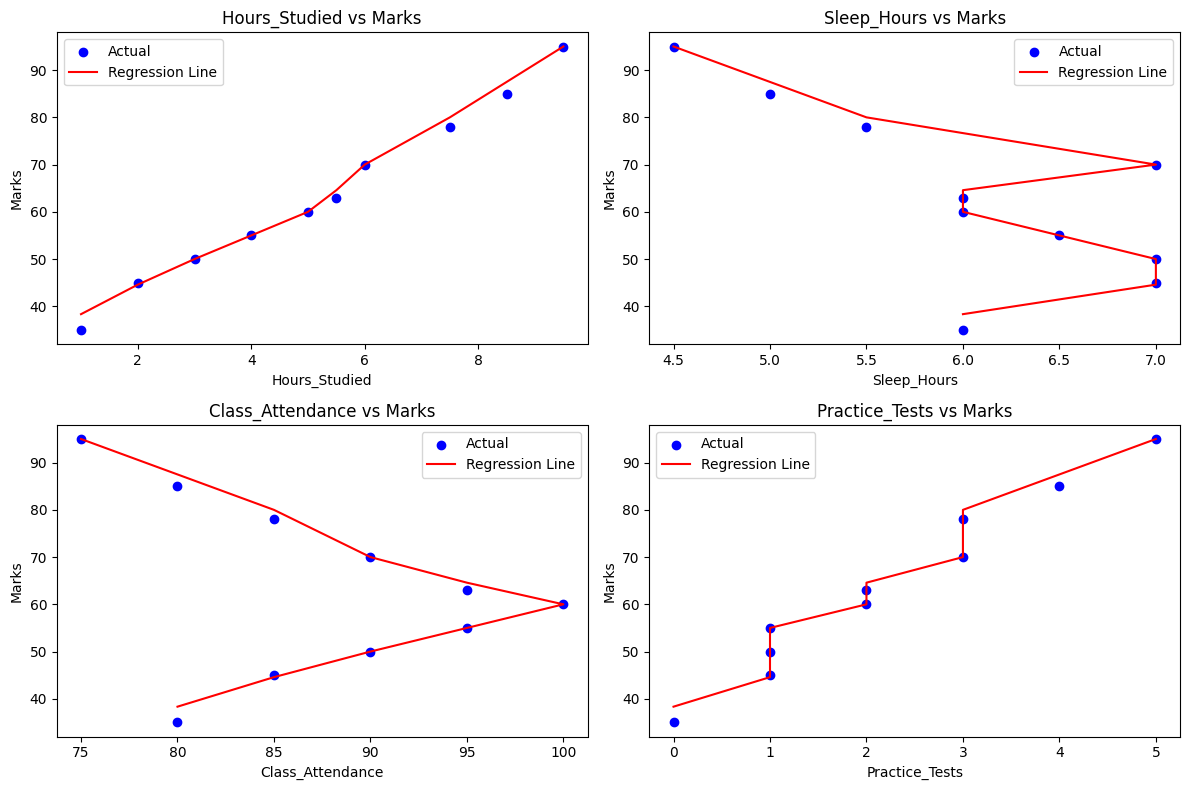

In [108]:
plt.figure(figsize=(12, 8))
features = ['Hours_Studied', 'Sleep_Hours', 'Class_Attendance', 'Practice_Tests']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feature], df['Marks'], color='blue', label='Actual')
    # Predict marks using only this feature (for visualization)
    X_feature = df[[feature]]
    y_pred_feature = model.predict(df[features])
    plt.plot(df[feature], y_pred_feature, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Marks')
    plt.title(f'{feature} vs Marks')
    plt.legend()

plt.tight_layout()
plt.show()


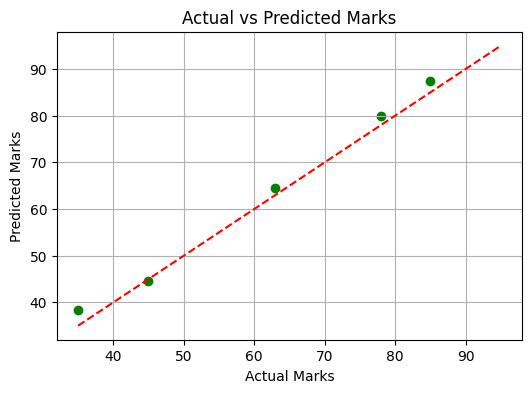

In [109]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.grid(True)
plt.show()
